<a href="https://colab.research.google.com/github/Abhaytyagi55/Abhaytyagi55/blob/main/Cohort_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cohort Analysis: Process We Can Follow**

Cohort analysis is valuable for businesses as it allows them to understand user behaviour in a more granular and actionable way. Below is the process we can follow for the task of Cohort Analysis:

1.The first step is to define the cohorts based on a specific characteristic or event. For example, in an e-commerce platform, cohorts could be defined based on the month of a user’s first purchase.

2.Gather relevant data for analysis.

3.Determine the time intervals you want to analyze.

4.Group users into cohorts based on the defined characteristic or event.

5.Choose the key performance metrics you want to analyze.

6.Calculate the chosen metrics for each cohort over the specified time periods.

7.Create visualizations to present your findings effectively.

A dataset for Cohort Analysis typically includes user or customer data, such as registration date, purchase history, engagement metrics, or any other data points relevant to the analysis. I found an ideal dataset for this task.

**Cohort Analysis using Python**

Now, let’s get started with the task of Cohort Analysis by importing the necessary Python libraries and the dataset:

In [1]:
import pandas as pd

# Upload the first CSV file (replace 'file1.csv' with the actual filename)
from google.colab import files
uploaded = files.upload()

Saving cohorts.csv to cohorts.csv


In [2]:
import pandas as pd

data = pd.read_csv("cohorts.csv")
print(data.head())

         Date  New users  Returning users  Duration Day 1  Duration Day 7
0  25/10/2023       3461             1437      202.156977      162.523809
1  26/10/2023       3777             1554      228.631944      258.147059
2  27/10/2023       3100             1288      227.185841      233.550000
3  28/10/2023       2293              978      261.079545      167.357143
4  29/10/2023       2678             1082      182.567568      304.350000


Now, let’s have a look at whether the dataset has any null values or not:

In [3]:
missing_values = data.isnull().sum()
print(missing_values)

Date               0
New users          0
Returning users    0
Duration Day 1     0
Duration Day 7     0
dtype: int64


Now, let’s have a look at the datatypes of all the columns in the data:

In [4]:
data_types = data.dtypes
print(data_types)

Date                object
New users            int64
Returning users      int64
Duration Day 1     float64
Duration Day 7     float64
dtype: object


The Date column is in object (string) format. For effective analysis, especially in cohort analysis, we should convert this to a datetime format:

In [5]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

Now, let’s have a look at the descriptive statistics of the dataset:

In [6]:
# Display the descriptive statistics of the dataset
descriptive_stats = data.describe()
print(descriptive_stats)

                      Date    New users  Returning users  Duration Day 1  \
count                   30    30.000000        30.000000       30.000000   
mean   2023-11-08 12:00:00  3418.166667      1352.866667      208.259594   
min    2023-10-25 00:00:00  1929.000000       784.000000       59.047619   
25%    2023-11-01 06:00:00  3069.000000      1131.500000      182.974287   
50%    2023-11-08 12:00:00  3514.500000      1388.000000      206.356554   
75%    2023-11-15 18:00:00  3829.500000      1543.750000      230.671046   
max    2023-11-23 00:00:00  4790.000000      1766.000000      445.872340   
std                    NaN   677.407486       246.793189       64.730830   

       Duration Day 7  
count       30.000000  
mean       136.037157  
min          0.000000  
25%         68.488971  
50%        146.381667  
75%        220.021875  
max        304.350000  
std         96.624319  


The descriptive statistics provide the following insights:

**New Users:** The average number of new users is around 3,418 with a standard deviation of approximately 677. The minimum and maximum new users recorded are 1,929 and 4,790, respectively.

**Returning Users:** On average, there are about 1,353 returning users, with a standard deviation of around 247. The minimum and maximum are 784 and 1,766, respectively.

**Duration Day 1:** The average duration on the first day is about 208 seconds with a considerable spread (standard deviation is around 65).

**Duration Day 7:** The average 7-day duration is lower, around 136 seconds, with a larger standard deviation of about 97. The range is from 0 to 304.

Now, let’s have a look at the trend of the new and returning users over time:

In [7]:
import plotly.graph_objects as go
import plotly.express as px

import plotly.io as pio
pio.templates.default = "plotly_white"

# Trend analysis for New and Returning Users
fig = go.Figure()

# New Users
fig.add_trace(go.Scatter(x=data['Date'], y=data['New users'], mode='lines+markers', name='New Users'))

# Returning Users
fig.add_trace(go.Scatter(x=data['Date'], y=data['Returning users'], mode='lines+markers', name='Returning Users'))

# Update layout
fig.update_layout(title='Trend of New and Returning Users Over Time',
                  xaxis_title='Date',
                  yaxis_title='Number of Users')

fig.show()

Now, let’s have a look at the trend of duration over time:

In [8]:
fig = px.line(data_frame=data, x='Date', y=['Duration Day 1', 'Duration Day 7'], markers=True, labels={'value': 'Duration'})
fig.update_layout(title='Trend of Duration (Day 1 and Day 7) Over Time', xaxis_title='Date', yaxis_title='Duration', xaxis=dict(tickangle=-45))
fig.show()

Now, let’s have a look at the correlation between the variables:

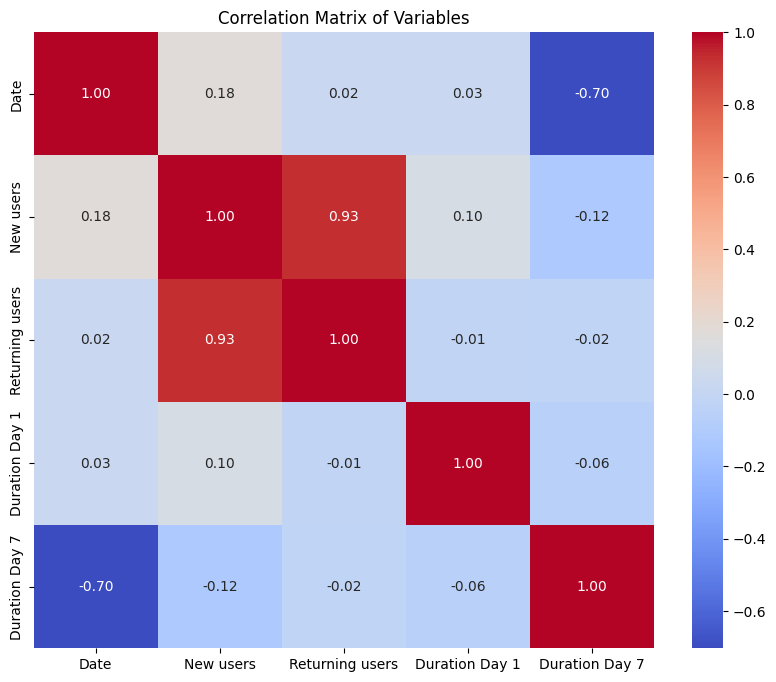

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

Here, the strongest correlation is between the number of new and returning users, indicating a potential trend of new users converting to returning users.

**Now Here’s How to Perform Cohort Analysis using Python**

For the task of Cohort Analysis, we’ll group the data by the week of the year to create cohorts. Then, for each cohort (week), we’ll calculate the average number of new and returning users, as well as the average of Duration Day 1 and Duration Day 7. Let’s start by grouping the data by week and calculating the necessary averages:

In [10]:
# Grouping data by week
data['Week'] = data['Date'].dt.isocalendar().week

# Calculating weekly averages
weekly_averages = data.groupby('Week').agg({
    'New users': 'mean',
    'Returning users': 'mean',
    'Duration Day 1': 'mean',
    'Duration Day 7': 'mean'
}).reset_index()

print(weekly_averages.head())

   Week    New users  Returning users  Duration Day 1  Duration Day 7
0    43  3061.800000      1267.800000      220.324375      225.185602
1    44  3503.571429      1433.142857      189.088881      168.723200
2    45  3297.571429      1285.714286      198.426524      143.246721
3    46  3222.428571      1250.000000      248.123542      110.199609
4    47  4267.750000      1616.250000      174.173330        0.000000


Now, let’s have a look at the weekly average of the new and returning users and the duration:

In [11]:
fig1 = px.line(weekly_averages, x='Week', y=['New users', 'Returning users'], markers=True,
               labels={'value': 'Average Number of Users'}, title='Weekly Average of New vs. Returning Users')
fig1.update_xaxes(title='Week of the Year')
fig1.update_yaxes(title='Average Number of Users')

fig2 = px.line(weekly_averages, x='Week', y=['Duration Day 1', 'Duration Day 7'], markers=True,
               labels={'value': 'Average Duration'}, title='Weekly Average of Duration (Day 1 vs. Day 7)')
fig2.update_xaxes(title='Week of the Year')
fig2.update_yaxes(title='Average Duration')

fig1.show()
fig2.show()

Now, let’s create a cohort chart to understand the cohort matrix of weekly averages. In the cohort chart, each row will correspond to a week of the year, and each column will represent a different metric:

Average number of new users.

Average number of returning users.

Average duration on Day 1.

Average duration on Day 7.

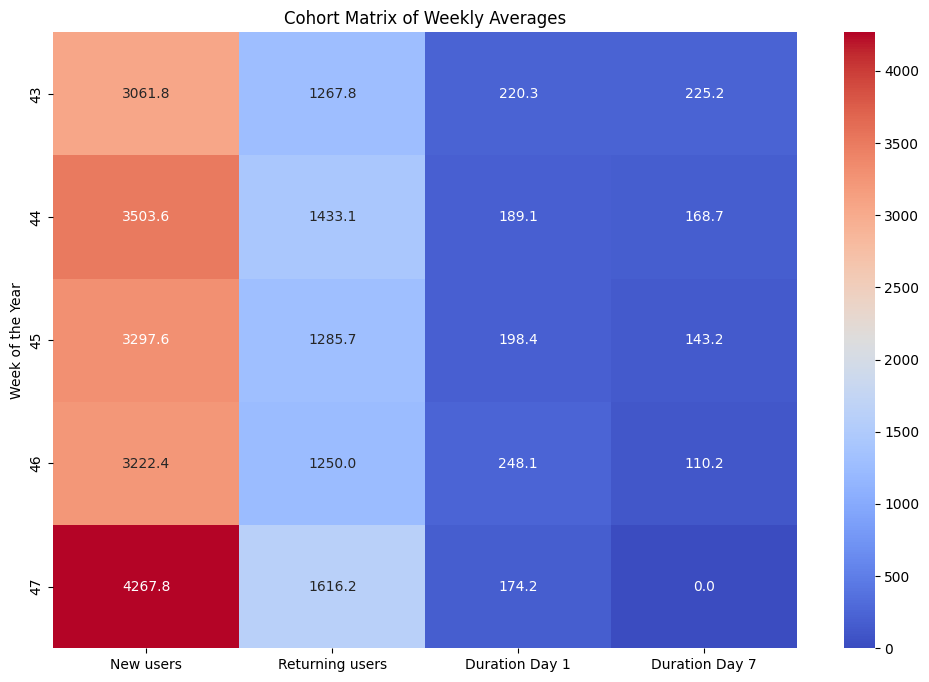

In [12]:
# Creating a cohort matrix
cohort_matrix = weekly_averages.set_index('Week')

# Plotting the cohort matrix
plt.figure(figsize=(12, 8))

sns.heatmap(cohort_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Cohort Matrix of Weekly Averages')
plt.ylabel('Week of the Year')
plt.show()

We can see that the number of new users and returning users fluctuates from week to week. Notably, there was a significant increase in both new and returning users in Week 47. The average duration of user engagement on Day 1 and Day 7 varies across the weeks. The durations do not follow a consistent pattern about the number of new or returning users, suggesting that other factors might be influencing user engagement.

**Summary**

Cohort Analysis is a data analysis technique used to gain insights into the behaviour and characteristics of specific groups of users or customers over time. It is valuable for businesses as it allows them to understand user behaviour in a more granular and actionable way. I hope you liked this article on Cohort Analysis using Python. Feel free to ask valuable questions in the comments section below.